In [34]:
# importing libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Data Gathering for 2017 dataset

In [3]:
# getting the dataset
data2017 = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Mansi\Research\CrimeAgainstWomen\dataset\NCRB_2017.csv");

In [5]:
data2017.head()

,S. No (Col.1),City (Col.2),IPC - Murder with Rape/Gang Rape - I (Col.3),IPC - Murder with Rape/Gang Rape - V (Col.4),IPC - Murder with Rape/Gang Rape - R (Col.5),IPC - Dowry Deaths (Sec. 304B IPC) - I (Col.6),IPC - Dowry Deaths (Sec. 304B IPC) - V (Col.7),IPC - Dowry Deaths (Sec. 304B IPC) - R (Col.8),IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - I (Col.9),IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - V (Col.10),...,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - F) POCSO Act r/w Section 377 IPC / Unnatural Offences - R (Col.155),"SLL - Indecent Representation of Women (Prohibition) Act, 1986 - I (Col.156)","SLL - Indecent Representation of Women (Prohibition) Act, 1986 - V (Col.157)","SLL - Indecent Representation of Women (Prohibition) Act, 1986 - R (Col.158)",SLL - Total SLL Crimes against Women - I (Col.159),SLL - Total SLL Crimes against Women - V (Col.160),SLL - Total SLL Crimes against Women - R (Col.161),Total Crime against Women (IPC+SLL) - I (Col.162),Total Crime against Women (IPC+SLL) - V (Col.163),Total Crime against Women (IPC+SLL) - R (Col.164)
0,1,Ahmedabad (Gujarat),0,0,0.0,2,2,0.1,24,24,...,0.0,0,0,0,301,301,10.0,1405,1405,46.8
1,2,Bengaluru (Karnataka),2,2,0.0,48,53,1.2,89,89,...,0.1,0,0,0,1281,1371,31.6,3565,3737,87.8
2,3,Chennai (Tamil Nadu),0,0,0.0,3,3,0.1,24,24,...,0.0,1,1,0,368,531,8.5,642,805,14.9
3,4,Coimbatore (Tamil Nadu),0,0,0.0,0,0,0.0,0,0,...,0.0,0,0,0,39,39,3.6,76,76,7.1
4,5,Delhi,6,6,0.1,102,102,1.3,38,39,...,0.0,1,1,0,1492,1498,19.7,11542,12151,152.4


# changing the names of columns

In [13]:
def removeCol(columns):
    new_col = []
    for col in columns:
        # Remove the pattern (Col.x)
        new_name = re.sub(r'\(Col\.\d+\)', '', col).strip()
        new_col.append(new_name)
    return new_col

In [21]:
data2017.columns = removeCol(data2017.columns)
for col in data2017.columns:
    print(col)

S. No
City
IPC - Murder with Rape/Gang Rape - I
IPC - Murder with Rape/Gang Rape - V
IPC - Murder with Rape/Gang Rape - R
IPC - Dowry Deaths (Sec. 304B IPC) - I
IPC - Dowry Deaths (Sec. 304B IPC) - V
IPC - Dowry Deaths (Sec. 304B IPC) - R
IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - I
IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - V
IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - R
IPC - Miscarriage (Sec. 313 & 314 IPC) - I
IPC - Miscarriage (Sec. 313 & 314 IPC) - V
IPC - Miscarriage (Sec. 313 & 314 IPC) - R
IPC - Acid Attack (Sec. 326A IPC) - I
IPC - Acid Attack (Sec. 326A IPC) - V
IPC - Acid Attack (Sec. 326A IPC) - R
IPC - Attempt to Acid Attack (Sec. 326B IPC) - I
IPC - Attempt to Acid Attack (Sec. 326B IPC) - V
IPC - Attempt to Acid Attack (Sec. 326B IPC) - R
IPC - Cruelty by Husband or his relatives (Sec. 498 A IPC) - I
IPC - Cruelty by Husband or his relatives (Sec. 498 A IPC) - V
IPC - Cruelty by Husband or his relatives (Sec. 498 A IPC) - R
IPC - Ki

In [19]:
# checking missing values
missing_values = data2017.isnull().sum()
print(missing_values)
# data has no missing values

S. No                                       0
City                                        0
IPC - Murder with Rape/Gang Rape - I        0
IPC - Murder with Rape/Gang Rape - V        0
IPC - Murder with Rape/Gang Rape - R        0
                                           ..
SLL - Total SLL Crimes against Women - V    0
SLL - Total SLL Crimes against Women - R    0
Total Crime against Women (IPC+SLL) - I     0
Total Crime against Women (IPC+SLL) - V     0
Total Crime against Women (IPC+SLL) - R     0
Length: 164, dtype: int64


In [30]:
# considering only Registered data we will remove the other details

# Filter columns ending with 'R'
registered_columns = [col for col in data2017.columns if col.endswith('R')]

# "City" columns
columns_to_keep = ['City'] + registered_columns

# Filter the DataFrame to include only the selected columns
df2017 = data2017[columns_to_keep]

In [31]:
df2017.head()

,City,IPC - Murder with Rape/Gang Rape - R,IPC - Dowry Deaths (Sec. 304B IPC) - R,IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - R,IPC - Miscarriage (Sec. 313 & 314 IPC) - R,IPC - Acid Attack (Sec. 326A IPC) - R,IPC - Attempt to Acid Attack (Sec. 326B IPC) - R,IPC - Cruelty by Husband or his relatives (Sec. 498 A IPC) - R,IPC - Kidnapping & Abduction of Women - Total - R,IPC - Kidnapping & Abduction of Women - Sec. 336 IPC - R,...,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - Total - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - A) Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 376 IPC) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - B) Sexual Assault of Children (Sec. 8 & 10 of POCSO Act) / Sec. 354 IPC) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - C) Sexual Harassment (Sec. 12 of POCSO Act) / Sec. 509 IPC) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - D) Use of Child for Pornography/Storing Child Pornography Material (Sec. 14 & 15 of POCSO Act) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - E) POCSO Act (Sections 17 to 22) / Other offences of POCSO Act - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - F) POCSO Act r/w Section 377 IPC / Unnatural Offences - R,"SLL - Indecent Representation of Women (Prohibition) Act, 1986 - R",SLL - Total SLL Crimes against Women - R,Total Crime against Women (IPC+SLL) - R
0,Ahmedabad (Gujarat),0.0,0.1,0.8,0.0,0.0,0.0,22.2,3.9,1.2,...,9.7,7.4,1.7,0.5,0.0,0.1,0.0,0,10.0,46.8
1,Bengaluru (Karnataka),0.0,1.2,2.2,0.1,0.0,0.0,12.1,10.6,10.1,...,9.9,6.8,2.0,0.8,0.0,0.1,0.1,0,31.6,87.8
2,Chennai (Tamil Nadu),0.0,0.1,0.6,0.0,0.0,0.0,2.9,0.4,0.2,...,3.3,1.9,1.1,0.1,0.0,0.0,0.0,0,8.5,14.9
3,Coimbatore (Tamil Nadu),0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.2,0.0,...,1.3,0.7,0.6,0.0,0.0,0.0,0.0,0,3.6,7.1
4,Delhi,0.1,1.3,0.5,0.0,0.1,0.1,32.3,41.8,38.6,...,19.2,11.4,7.4,0.4,0.0,0.0,0.0,0,19.7,152.4


In [32]:
for col in df2017.columns:
    print(col)

City
IPC - Murder with Rape/Gang Rape - R
IPC - Dowry Deaths (Sec. 304B IPC) - R
IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - R
IPC - Miscarriage (Sec. 313 & 314 IPC) - R
IPC - Acid Attack (Sec. 326A IPC) - R
IPC - Attempt to Acid Attack (Sec. 326B IPC) - R
IPC - Cruelty by Husband or his relatives (Sec. 498 A IPC) - R
IPC - Kidnapping & Abduction of Women - Total - R
IPC - Kidnapping & Abduction of Women - Sec. 336 IPC - R
IPC - Kidnapping & Abduction of Women - In order to Murder (Sec. 364 IPC) - R
IPC - Kidnapping & Abduction of Women - For Ransom (Sec. 364A IPC) - R
IPC - Kidnapping & Abduction of Women - To Compel Her for Marriage (Sec. 366 IPC) - Total - R
IPC - Kidnapping & Abduction of Women - To Compel Her for Marriage (Sec. 366 IPC) - a) Women (Above 18 yrs) - R
IPC - Kidnapping & Abduction of Women - To Compel Her for Marriage (Sec. 366 IPC) - b) Girls (Below 18 yrs) - R
IPC - Kidnapping & Abduction of Women - Procuration of Minor Girls (Sec. 366A IPC) - R
IPC - K

# Visualization

In [54]:
cities = df2017['City'].tolist()
typeCrime = df2017.columns[1:]

KeyError: 'T'

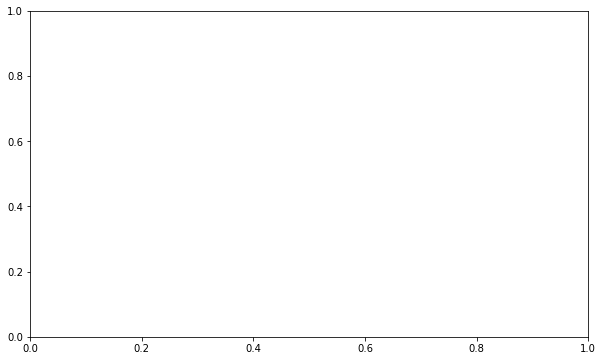

In [57]:
# Compare the distribution of different types of crimes within each city

# Creating stacked bar plot
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(len(cities))

for i, typeCrime in enumerate(typeCrime):
    ax.bar(cities, df2017[typeCrime],bottom = bottom, label=typeCrime)
    bottom+=df2017[typeCrime]
    
# Adding labels and legend
ax.set_xlabel("Cities")
ax.set_ylabel("Number of crimes")
ax.set_title("Stacked Bar Plot of Crimes by city")

# Displaying the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()            